In [1]:
"""
Charles Silkin
K-Means Clustering Project Code
FSU Interdisciplinary Data Science Master's Program - Applied Machine Learning Course
20 March 2023
"""

"\nCharles Silkin\nK-Means Clustering Project Code\nFSU Interdisciplinary Data Science Master's Program - Applied Machine Learning Course\n20 March 2023\n"

In [2]:
# Import packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import torch

In [3]:
# Load data
moons = np.loadtxt("moons.txt", delimiter = " ")
pts = np.loadtxt("pts.txt", delimiter = ",")
moons = torch.tensor(moons).float()
pts = torch.tensor(pts).float()

In [4]:
# Function to initialize random centroids
def random_centroids(dataset, k, random_state=42):
    
    ## Initialize random seed
    np.random.seed(random_state)
    
    ## List of centroids
    centroids = []
    
    ## Number of rows in the dataset
    m = dataset.shape[0]
    
    ## Iterate over number of clusters...
    for i in range(k):
        ### Choose random row of dataset to be centroid
        r = np.random.randint(0, m-1)
        ### Append to centroids list
        centroids.append(dataset[r])
    
    ## Return centroids
    return centroids

In [5]:
# Function for one iteration of k-means:
def k_means_init(data,k,random_state=0):
    ## Initialize number of rows and columns of data
    n,p = data.shape
    
    ## Initialize centroids and covariance matrix
    centroids = random_centroids(data,k,random_state)
    covariance = [torch.eye(p)]*k
    
    ## Initialize cluster labels and distance matrix
    cluster_labels = torch.zeros(n, dtype=int)
    distances = torch.zeros(n,k)
    
    ## Iterate over number of clusters...
    for j in range(k):
        
        ### Initialize inverse of covariance matrix
        inv_cov = torch.inverse(covariance[j])
        
        ### Iterate over number of clusters...
        for i in range(n):
            
            #### Calculate distance from each point to centroid of cluster j
            ind_dist = (data[i]-centroids[j]).view(-1,1)
            
            #### Get transpose of individual distance matrix
            ind_dist_t = torch.t(ind_dist)
            
            #### Input individual distances into main distance matrix
            distances[i,j] = ind_dist_t@inv_cov@ind_dist
    
    ## Cluster labels = index of minimum distance
    cluster_labels = torch.argmin(distances, dim=1)
    
    return cluster_labels

In [6]:
# Function for multiple iterations of K-means
def k_means_final(data,k,random_state=42, cov_update=True):
    ## Initialize centroids, covariance matrix, and distances (same process as 'k_means_init' function)
    n,p = data.shape

    centroids = random_centroids(data,k,random_state)
    covariance = [torch.eye(p)]*k

    cluster_labels = torch.zeros(n, dtype=int)
    distances = torch.zeros(n,k)

    for j in range(k):
        inv_cov = torch.inverse(covariance[j])
        
        for i in range(n):
            ind_dist = (data[i]-centroids[j]).view(-1,1)
            ind_dist_t = torch.t(ind_dist)
            
            distances[i,j] = ind_dist_t@inv_cov@ind_dist
    
    ## Initialize parameter for convergence
    convergence = False
    
    ## While there is no convergence...
    while convergence == False:
        
        ### Initialize cluster labels at previous iteration:
        init_clusters = cluster_labels
        
        ### Compute cluster labels at current iteration:
        cluster_labels = torch.argmin(distances, dim=1)
        
        ### Update centroids and covariance matrix:
        for j in range(k):
            
            #### Compute number of points in each cluster
            cluster_points = torch.sum(cluster_labels==j).item()
                      
            #### Make sure there's at least one point in each cluster:
            if cluster_points > 1:
            
                #### Update centroids
                centroids[j] = torch.mean(data[cluster_labels == j], dim=0)

                #### Update covariance matrix (if cov_update parameter == True)

                if cov_update == True:
                    ##### Tensor object containing n pxp individual covariance matrices
                    cov_list = torch.zeros(n,p,p)

                    ##### For each data point...
                    for i in range(n):

                        ## Obtain distance to centroid and transpost
                        ind_dist = (data[i]-centroids[j]).view(-1,1)
                        ind_dist_t = torch.t(ind_dist)

                        ## Compute numerator of covariance
                        cov_list[i]=ind_dist@ind_dist_t

                    ##### Compute final covariance matrix for each cluster
                    covariance[j] = torch.sum(cov_list, dim=0)/(cluster_points - 1)

                if cov_update == False:
                    covariance[j] = torch.eye(p)
            
        ### Update distances (same procedure as initial distance computation):
            for j in range(k):
                inv_cov = torch.inverse(covariance[j])
                for i in range(n):
                    ind_dist = (data[i]-centroids[j]).view(-1,1)
                    ind_dist_t = torch.t(ind_dist)

                    distances[i,j] = ind_dist_t@inv_cov@ind_dist
        
        ### Check for convergence (stop iterating):
        if torch.equal(init_clusters, cluster_labels) == True:
            convergence = True
    
    ## Return final cluster labels:
    return cluster_labels

Text(0.5, 1.0, '6 Clusters, Non-Constant Covariance')

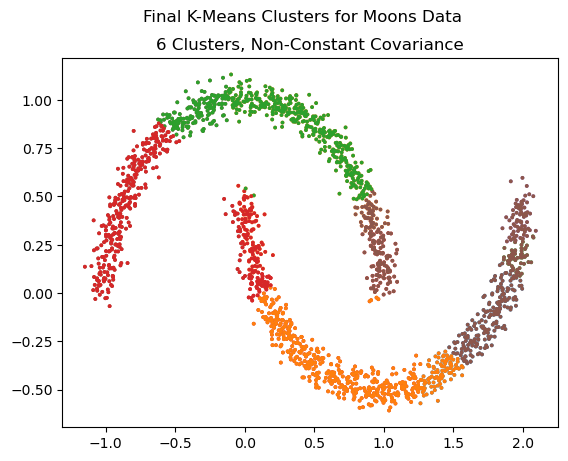

In [7]:
# PART A:

## Get initial cluster assignments
kmeans_init_1a = k_means_init(moons,6)

## List of colors
pt_cols = list(mcolors.TABLEAU_COLORS.values())

## Plot
cols = [pt_cols[i] for i in kmeans_init_1a]
plt.scatter(moons[:,0],moons[:,1],s = 3, c = cols)
plt.suptitle("Initial K-Means Clusters for Moons Data")
plt.title("6 Clusters, Non-Constant Covariance")

## Get final cluster assignments
kmeans_final_1a = k_means_final(moons,6)

## Plot
cols = [pt_cols[i] for i in kmeans_final_1a]
plt.scatter(moons[:,0],moons[:,1],s = 3, c = cols)
plt.suptitle("Final K-Means Clusters for Moons Data")
plt.title("6 Clusters, Non-Constant Covariance")

Text(0.5, 1.0, '6 Clusters, Identity Covariance Matrix Throughout')

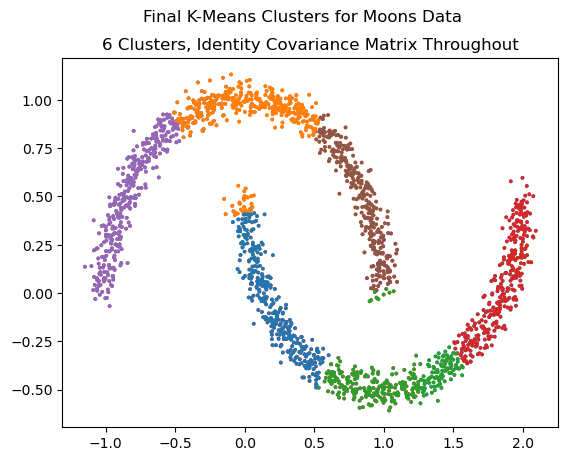

In [8]:
# PART B:

## Get initial cluster assignments (should be same as 1A since only one iteration)
kmeans_init_1b = k_means_init(moons,6)

## Plot
cols = [pt_cols[i] for i in kmeans_init_1b]
plt.scatter(moons[:,0],moons[:,1],s = 3, c = cols)
plt.suptitle("Initial K-Means Clusters for Moons Data")
plt.title("6 Clusters, Identity Covariance Matrix Throughout")

## Get final cluster assignments
kmeans_final_1b = k_means_final(moons,6, cov_update=False)

## Plot
cols = [pt_cols[i] for i in kmeans_final_1b]
plt.scatter(moons[:,0],moons[:,1],s = 3, c = cols)
plt.suptitle("Final K-Means Clusters for Moons Data")
plt.title("6 Clusters, Identity Covariance Matrix Throughout")

Text(0.5, 1.0, '10 Clusters')

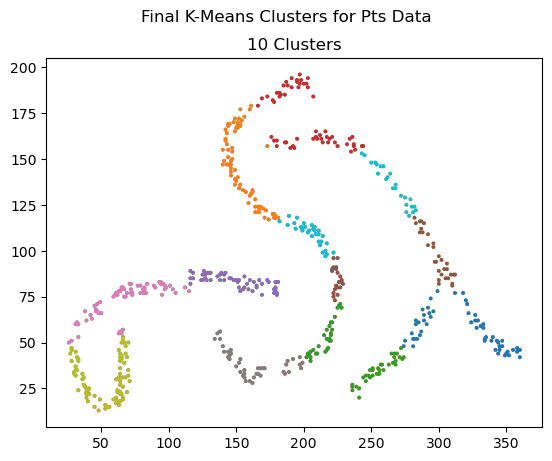

In [9]:
# PART C:

## Get initial cluster assignments
kmeans_init_1c = k_means_init(pts,10)

## Plot
cols = [pt_cols[i] for i in kmeans_init_1c]
plt.scatter(pts[:,0],pts[:,1],s = 3, c = cols)
plt.suptitle("Initial K-Means Clusters for Pts Data")
plt.title("10 Clusters")

## Get final cluster assignments
kmeans_final_1c = k_means_final(pts,10)

## Plot
cols = [pt_cols[i] for i in kmeans_final_1c]
plt.scatter(pts[:,0],pts[:,1],s = 3, c = cols)
plt.suptitle("Final K-Means Clusters for Pts Data")
plt.title("10 Clusters")

Text(0.5, 1.0, '16 Clusters')

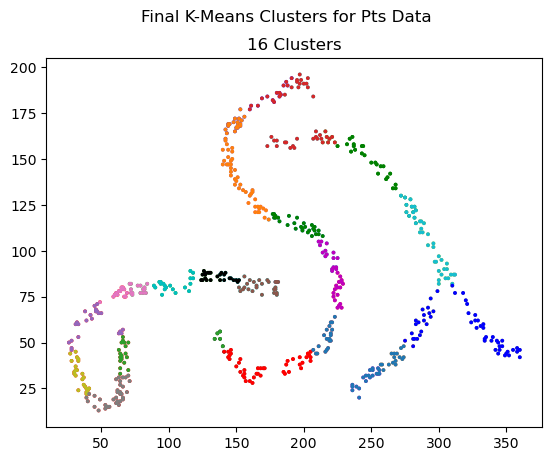

In [10]:
# PART D:

## Add colors to make sure there's a color for all 16 clusters
pt_cols = pt_cols + ['b','g','c','m','r','k']

## Get initial cluster assignments
kmeans_init_1d = k_means_init(pts,16)

## Plot
cols = [pt_cols[i] for i in kmeans_init_1d]
plt.scatter(pts[:,0],pts[:,1],s = 3, c = cols)
plt.suptitle("Initial K-Means Clusters for Pts Data")
plt.title("16 Clusters")

## Get final cluster assignments
kmeans_final_1d = k_means_final(pts,16)

## Plot
cols = [pt_cols[i] for i in kmeans_final_1d]
plt.scatter(pts[:,0],pts[:,1],s = 3, c = cols)
plt.suptitle("Final K-Means Clusters for Pts Data")
plt.title("16 Clusters")